In [1]:
import numpy as np
import operator


In [2]:
# creating fake dataset
def createDataSet():
    groups = np.array([[1, 1.1],
                      [1,1],
                      [0,0],
                      [0,0.1]])
    labels = ['A', 'A', 'B', 'B']
    return groups, labels


In [9]:
groups, labels = createDataSet()
print(type(groups))
print(groups)
print(type(labels))
print(labels)

<class 'numpy.ndarray'>
[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
<class 'list'>
['A', 'A', 'B', 'B']


In [6]:
# classifier

# datapoint
inX = [0,0]

# dataset
dataSet = groups

# nearest neighbors
k = 3

dataSetSize = dataSet.shape[0]
print(dataSetSize)

4


In [8]:
# tile input data to be able to calculate distances
np.tile(inX , (dataSetSize,1))

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [10]:
# calculate difference 
diffMat = np.tile(inX , (dataSetSize,1)) - dataSet
print(diffMat)

[[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]


In [11]:
# square of differences
sqDiffMat = diffMat**2
print(sqDiffMat)

[[1.   1.21]
 [1.   1.  ]
 [0.   0.  ]
 [0.   0.01]]


In [17]:
# sum of squares of diff
sqDistances = sqDiffMat.sum(axis=1)
print(sqDistances)

[2.21 2.   0.   0.01]


In [18]:
# square root of sum of squares of diff
distances = sqDistances**0.5
print(distances)

[1.48660687 1.41421356 0.         0.1       ]


In [19]:
# sort the distances 
sortedDistIndices = distances.argsort()
print(sortedDistIndices)

[2 3 1 0]


In [20]:
sortedDistIndices[1]

3

In [25]:
# picking up nearest distances
voteIlabel = labels[sortedDistIndices[0]]
print(voteIlabel)

classCount={}
classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
print(classCount)

classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
print(classCount)


voteIlabel = labels[sortedDistIndices[2]]
print(voteIlabel)

classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
print(classCount)


B
{'B': 1}
{'B': 2}
A
{'B': 2, 'A': 1}


In [35]:
# sort the k nearest and select class with max freq
sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
print(sortedClassCount)
classified = sortedClassCount[0][0]
print(classified)

[('B', 2), ('A', 1)]
B


In [34]:
sortedClassCount[0][0]

'B'

In [36]:
# inX : input datapoint  
# dataSet : the provided dataset
# labels : labels / classes
# k : k nearest neighbours
def classify0(inX, dataSet, labels, k):
    # get the shape of the dataset
    dataSetShape = dataSet.shape[0]
    
    # create diff dataset
    diffMat = np.tile(inX, (dataSetShape, 1)) - dataSet
    
    # square of differences
    diffMat = diffMat ** 2
    
    # sum of squares of diff
    sqDistances = diffMat.sum(axis=1)
    
    # sqrt of distance
    sqDistances = sqDistances ** 0.5
    
    sortedDistIndices = sqDistances.argsort()
    classCount={}
    for i in range(k):
        votedIlabel = labels[sortedDistIndices[i]]
        classCount[votedIlabel] = classCount.get(votedIlabel, 0) + 1
    
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
        

In [37]:
classify0([0,0], groups, labels, 3)

'B'

In [47]:
print(dataSet[:,0])
print(dataSet[:,1])


[1. 1. 0. 0.]
[1.1 1.  0.  0.1]


[1. 1. 0. 0.] [1.1 1.  0.  0.1]


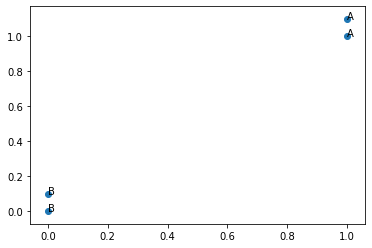

In [60]:
import matplotlib.pyplot as plt

x = dataSet[:,0]
y = dataSet[:,1]

print(x, y)
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, lbl in enumerate(labels):
    ax.annotate(lbl, (x[i], y[i]))


In [70]:
def plotData(lbl_p, p):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    for i, lbl in enumerate(labels):
        ax.annotate(lbl, (x[i], y[i]))
    ax.scatter(p[0], p[1])
    ax.annotate(lbl_p, p)

B


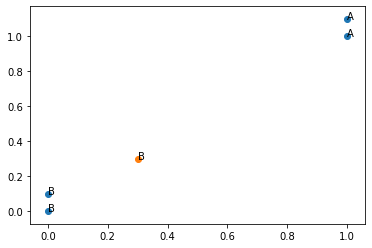

In [73]:
p1 = [0.3, 0.3]

cp1 = classify0(p1, groups, labels, 3)

print(cp1)
plotData(cp1, p1)


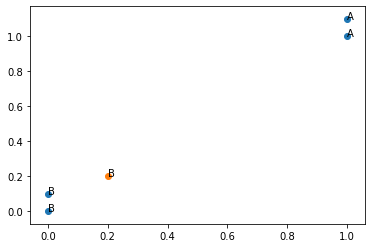

In [74]:
p1 = [0.2, 0.2]
plotData(classify0(p1, groups, labels, 3), p1)

In [76]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

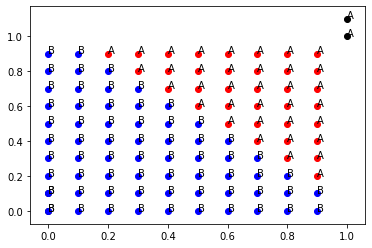

In [90]:
x = dataSet[:,0]
y = dataSet[:,1]

color_label = ['red', 'blue']
classes = ['A', 'B']
fig, ax = plt.subplots()
ax.scatter(x, y, color='black')
for i, lbl in enumerate(labels):
    ax.annotate(lbl, (x[i], y[i]))


for x in np.arange(0,1,0.1):
    for y in np.arange(0,1,0.1):
        c = classify0([x,y], groups, labels, 3)
        ax.scatter(x, y, color=color_label[classes.index(c)])
        ax.annotate(c, [x,y])

In [85]:
classes = ['A', 'B']
color_label = ['red', 'blue']

In [87]:
color_label[classes.index('B')]

'blue'

### Normalizing dataset

In [104]:
d = np.array([[1,2],
             [3,4]])
print("d.max(0) =", d.max(0))
print("d.max(1) =", d.max(1))
print("d.max()  =", d.max())

d.max(0) = [3 4]
d.max(1) = [2 4]
d.max()  = 4


In [ ]:
# normalize a dataset
def autoNorm(dataset):
    minVals = dataset.min(0)
    maxVals = dataset.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataset))
    m = dataset.shape[0]
    normDataSet = dataset - tile(minVals, (m,1))
    normDataSet = normDataSet / tile(ranges, (m,1))
    
    # return ranges and minvals because you need 
    # it for test data to recover original value
    return normDataSet, ranges, minVals
